In [1]:
# Installing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')
plt.style.use("dark_background")

import warnings
# Specifically ignore Deprecation Warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Ignore future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [12]:
data = pd.read_csv('/content/mba_decision_dataset.csv')
print(data)

      Person ID  Age  Gender Undergraduate Major  Undergraduate GPA  \
0             1   27    Male                Arts               3.18   
1             2   24    Male                Arts               3.03   
2             3   33  Female            Business               3.66   
3             4   31    Male         Engineering               2.46   
4             5   28  Female            Business               2.75   
...         ...  ...     ...                 ...                ...   
9995       9996   33  Female           Economics               3.55   
9996       9997   30  Female            Business               2.48   
9997       9998   31  Female           Economics               2.86   
9998       9999   22  Female                Arts               2.30   
9999      10000   22    Male                Arts               2.86   

      Years of Work Experience Current Job Title  Annual Salary (Before MBA)  \
0                            8      Entrepreneur                   

In [13]:
# So, we will print first five rows in the dataset

data.head()

Person ID  Age  Gender Undergraduate Major  Undergraduate GPA  \
0          1   27    Male                Arts               3.18   
1          2   24    Male                Arts               3.03   
2          3   33  Female            Business               3.66   
3          4   31    Male         Engineering               2.46   
4          5   28  Female            Business               2.75   

   Years of Work Experience Current Job Title  Annual Salary (Before MBA)  \
0                         8      Entrepreneur                       90624   
1                         4           Analyst                       53576   
2                         9          Engineer                       79796   
3                         1           Manager                      105956   
4                         9      Entrepreneur                       96132   

  Has Management Experience  GRE/GMAT Score  Undergrad University Ranking  \
0                        No             688                           185   
1                       Yes             791                           405   
2                        No             430                           107   
3                        No             356                           257   
4                        No             472                           338   

   Entrepreneurial Interest  Networking Importance MBA Funding Source  \
0                       7.9                    7.6               Loan   
1                       3.8                    4.1               Loan   
2                       6.7                    5.5        Scholarship   
3                       1.0                    5.3               Loan   
4                       9.5                    4.9               Loan   

  Desired Post-MBA Role  Expected Post-MBA Salary  \
0       Finance Manager                    156165   
1       Startup Founder                    165612   
2            Consultant                    122248   
3            Consultant                    123797   
4            Consultant                    197509   

  Location Preference (Post-MBA)     Reason for MBA Online vs. On-Campus MBA  \
0                  International   Entrepreneurship                On-Campus   
1                  International      Career Growth                   Online   
2                       Domestic  Skill Enhancement                   Online   
3                  International   Entrepreneurship                On-Campus   
4                       Domestic  Skill Enhancement                   Online   

  Decided to Pursue MBA?  
0                    Yes  
1                     No  
2                     No  
3                     No  
4                    Yes

In [14]:
# Now, last five rows

data.tail()

Person ID  Age  Gender Undergraduate Major  Undergraduate GPA  \
9995       9996   33  Female           Economics               3.55   
9996       9997   30  Female            Business               2.48   
9997       9998   31  Female           Economics               2.86   
9998       9999   22  Female                Arts               2.30   
9999      10000   22    Male                Arts               2.86   

      Years of Work Experience Current Job Title  Annual Salary (Before MBA)  \
9995                         5           Analyst                      109172   
9996                         5           Manager                       82515   
9997                         8           Manager                       34152   
9998                         1          Engineer                       61897   
9999                         2           Manager                      111499   

     Has Management Experience  GRE/GMAT Score  Undergrad University Ranking  \
9995                       Yes             524                           100   
9996                       Yes             330                           362   
9997                       Yes             681                           308   
9998                        No             481                           190   
9999                        No             710                           226   

      Entrepreneurial Interest  Networking Importance MBA Funding Source  \
9995                       9.2                    8.0               Loan   
9996                       7.4                    8.5        Scholarship   
9997                       6.8                    8.8               Loan   
9998                       5.7                    7.7        Self-funded   
9999                       8.0                    1.7           Employer   

     Desired Post-MBA Role  Expected Post-MBA Salary  \
9995       Startup Founder                     69000   
9996            Consultant                    131054   
9997            Consultant                    100806   
9998    Marketing Director                    115872   
9999    Marketing Director                    103245   

     Location Preference (Post-MBA)    Reason for MBA  \
9995                  International        Networking   
9996                       Domestic  Entrepreneurship   
9997                       Domestic        Networking   
9998                  International        Networking   
9999                       Domestic     Career Growth   

     Online vs. On-Campus MBA Decided to Pursue MBA?  
9995                   Online                    Yes  
9996                On-Campus                     No  
9997                On-Campus                    Yes  
9998                   Online                    Yes  
9999                On-Campus                     No

In [11]:
# This displays the no.of.rows and cols in the dataset
data.shape

(10000, 20)

In [15]:
# Now, we will check is there any null values in the dataset

print(f'number of NaN values in Data:\n {data.isna().sum()}')


number of NaN values in Data:
 Person ID                         0
Age                               0
Gender                            0
Undergraduate Major               0
Undergraduate GPA                 0
Years of Work Experience          0
Current Job Title                 0
Annual Salary (Before MBA)        0
Has Management Experience         0
GRE/GMAT Score                    0
Undergrad University Ranking      0
Entrepreneurial Interest          0
Networking Importance             0
MBA Funding Source                0
Desired Post-MBA Role             0
Expected Post-MBA Salary          0
Location Preference (Post-MBA)    0
Reason for MBA                    0
Online vs. On-Campus MBA          0
Decided to Pursue MBA?            0
dtype: int64


In [16]:
# next, i will change column name into easy format

data.drop('Person ID',axis=1,inplace=True)
data.rename(columns={'Decided to Pursue MBA?':'Pursue_MBA'},inplace=True)
data['Pursue_MBA']=data['Pursue_MBA'].replace({'Yes':1,'No':0})

In [17]:
# Now, we will see categorical and continous variables in the data

cat=[]
for col in data.columns:
    if data[col].dtype == 'object':
        cat.append(col)
print(f' Categorical Variables: {cat}\n')

cont = [col for col in data.columns if col not in cat]
print(f' Continous Variables: {cont}')

 Categorical Variables: ['Gender', 'Undergraduate Major', 'Current Job Title', 'Has Management Experience', 'MBA Funding Source', 'Desired Post-MBA Role', 'Location Preference (Post-MBA)', 'Reason for MBA', 'Online vs. On-Campus MBA']

 Continous Variables: ['Age', 'Undergraduate GPA', 'Years of Work Experience', 'Annual Salary (Before MBA)', 'GRE/GMAT Score', 'Undergrad University Ranking', 'Entrepreneurial Interest', 'Networking Importance', 'Expected Post-MBA Salary', 'Pursue_MBA']


# EDA

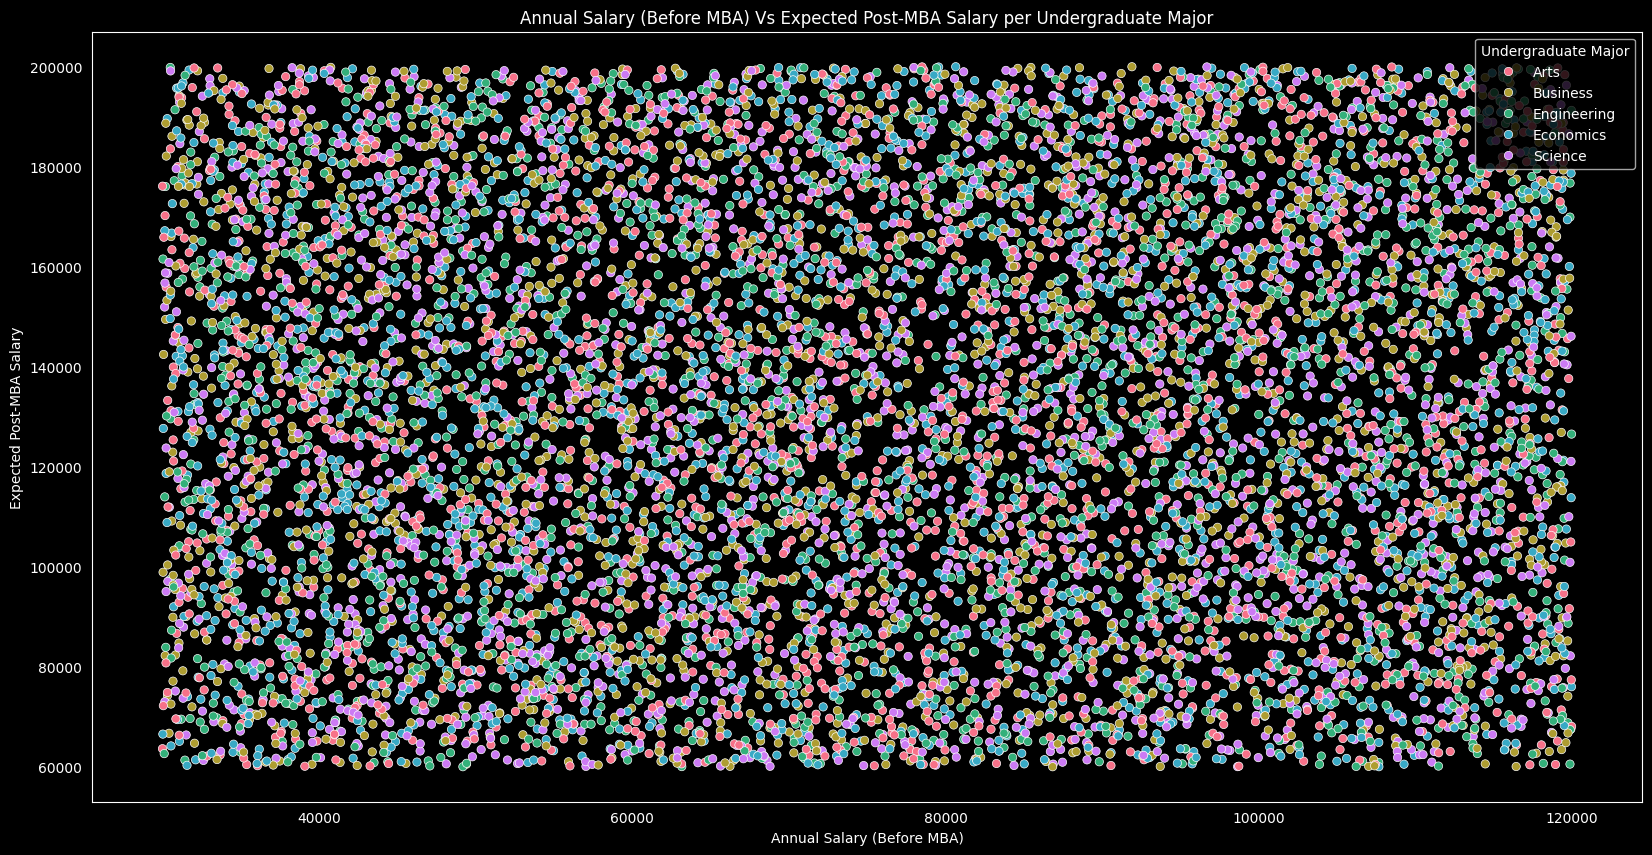

In [21]:
# Exploratory data analysis

# 1. Annual salary before MBA vs Expected post-MBA salary per UG major
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='Annual Salary (Before MBA)',y='Expected Post-MBA Salary',hue='Undergraduate Major',palette='husl')
plt.title("Annual Salary (Before MBA) Vs Expected Post-MBA Salary per Undergraduate Major")
plt.legend(title='Undergraduate Major', loc='upper right')
plt.show()

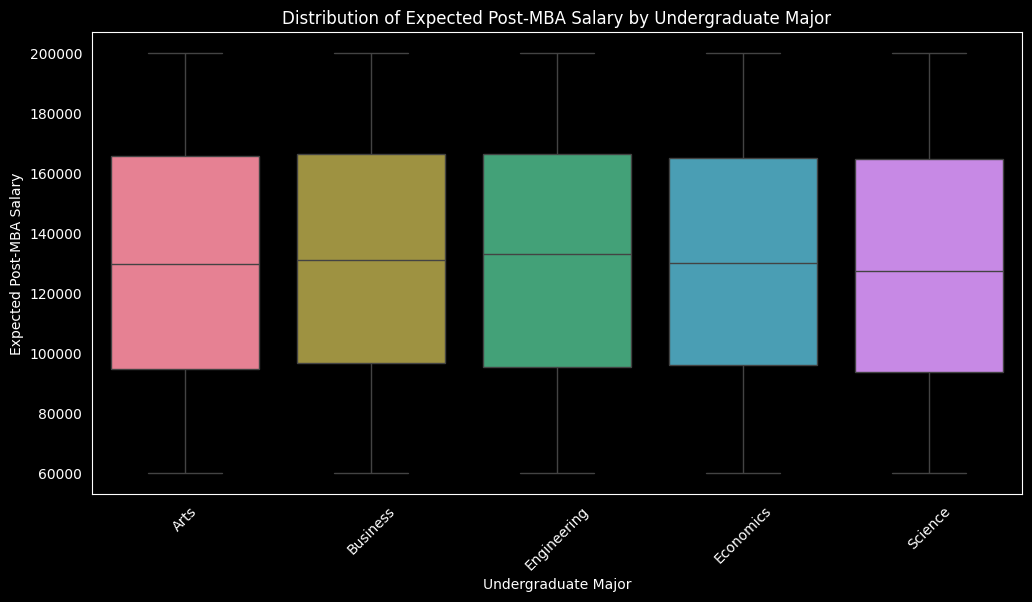

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Undergraduate Major', y='Expected Post-MBA Salary', palette='husl')
plt.title('Distribution of Expected Post-MBA Salary by Undergraduate Major')
plt.xlabel('Undergraduate Major')
plt.ylabel('Expected Post-MBA Salary')
plt.xticks(rotation=45)
plt.show()

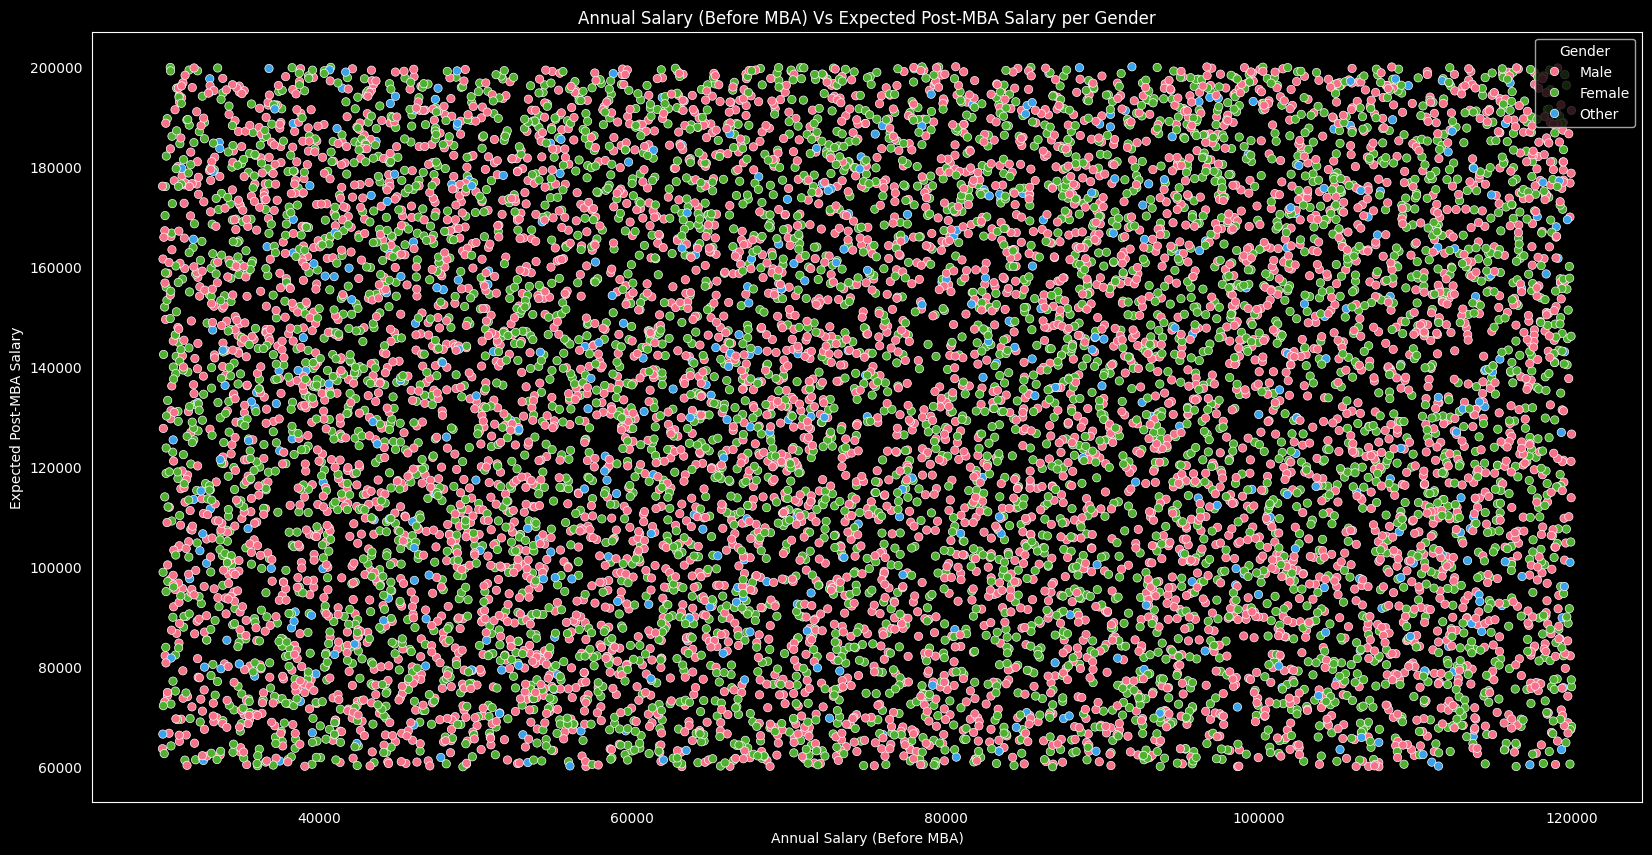

In [23]:
# 2. Annual salary before mba vs expected post-mba salary per sex
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='Annual Salary (Before MBA)',y='Expected Post-MBA Salary',hue='Gender',palette='husl')
plt.title("Annual Salary (Before MBA) Vs Expected Post-MBA Salary per Gender")
plt.legend(title='Gender', loc='upper right')
plt.show()

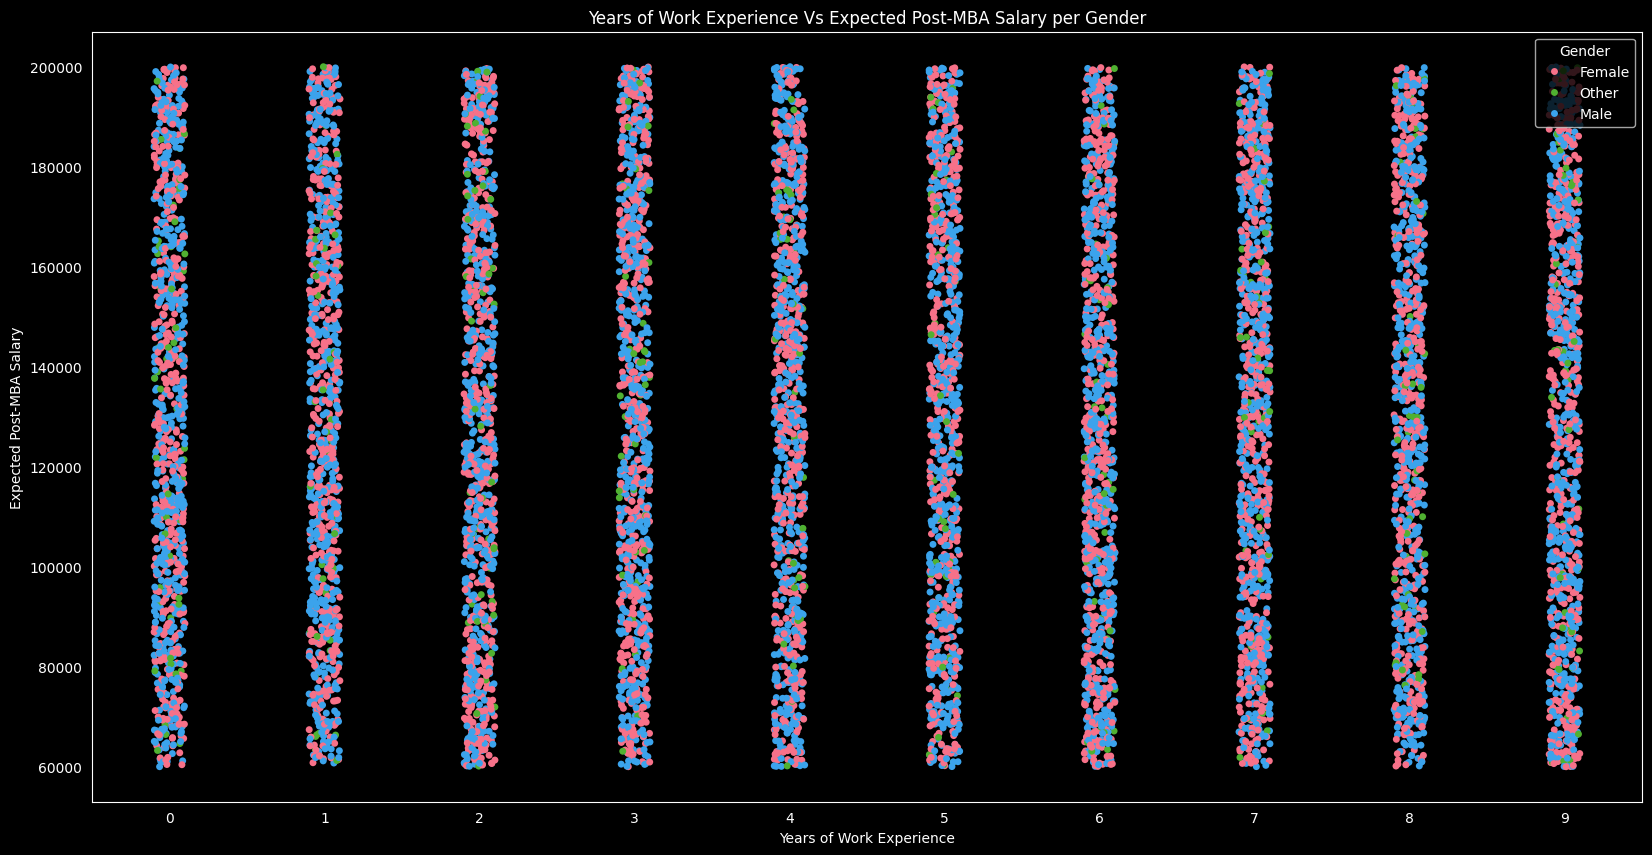

In [25]:
# 3. Years fo WE vs Expected post-mba salary per sex
plt.figure(figsize=(20,10))
sns.stripplot(data=data, x='Years of Work Experience',y='Expected Post-MBA Salary',hue='Gender',palette='husl')
plt.title("Years of Work Experience Vs Expected Post-MBA Salary per Gender")
plt.legend(title='Gender', loc='upper right')
plt.show()

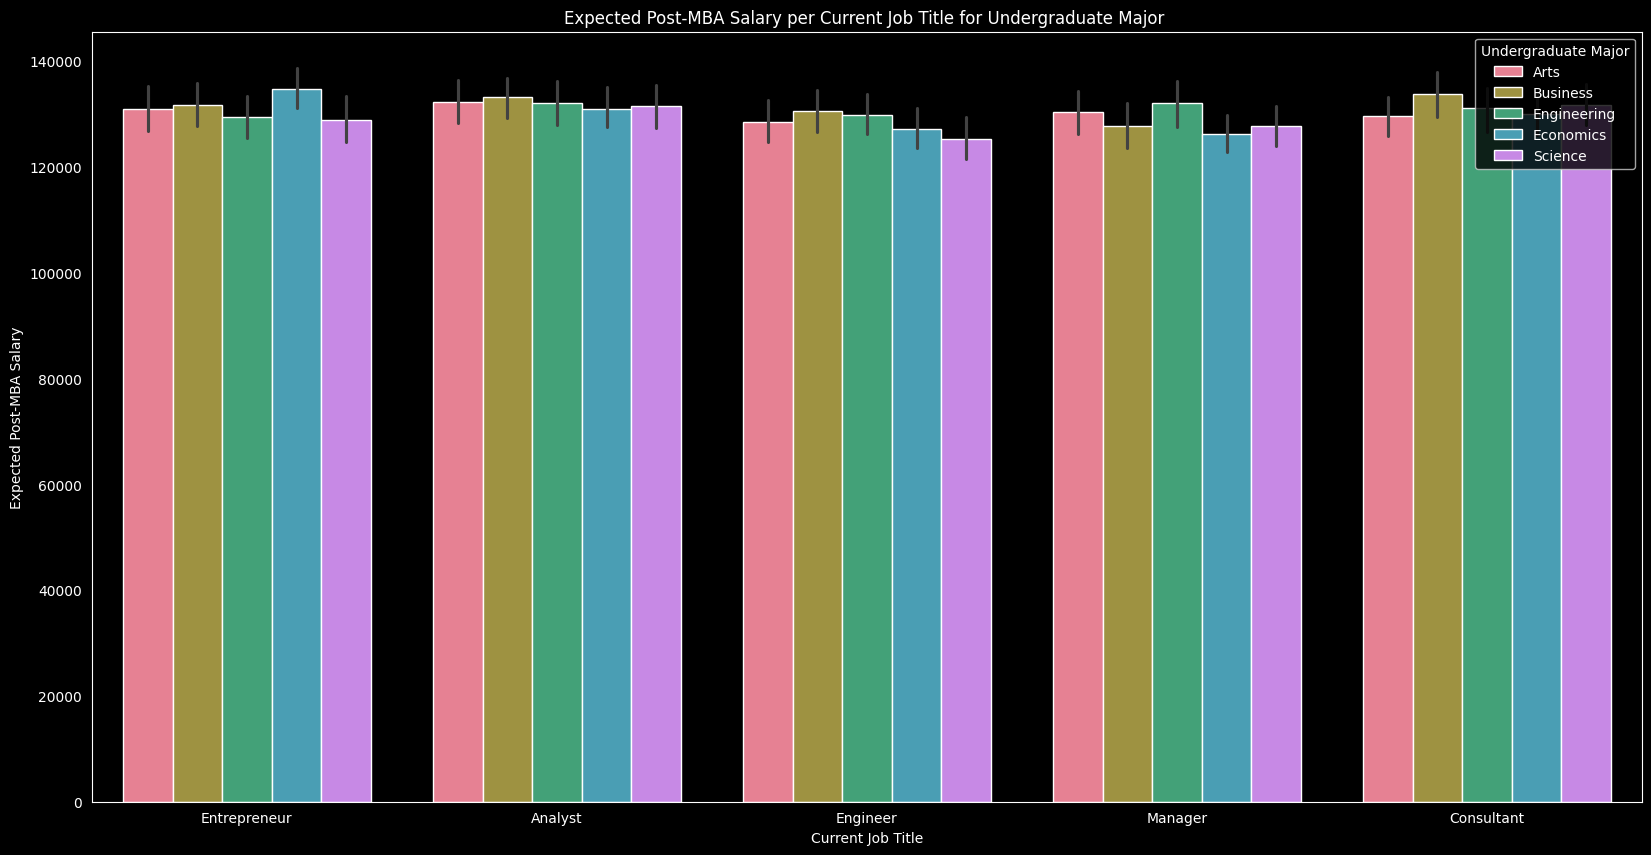

In [26]:
# 4. Expected Post-MBA Salary per Current Job Title for Undergraduate Major.
plt.figure(figsize=(20,10))
sns.barplot(data=data, x='Current Job Title',y='Expected Post-MBA Salary',hue='Undergraduate Major',palette='husl')
plt.title("Expected Post-MBA Salary per Current Job Title for Undergraduate Major ")
plt.legend(title='Undergraduate Major', loc='upper right')
plt.show()

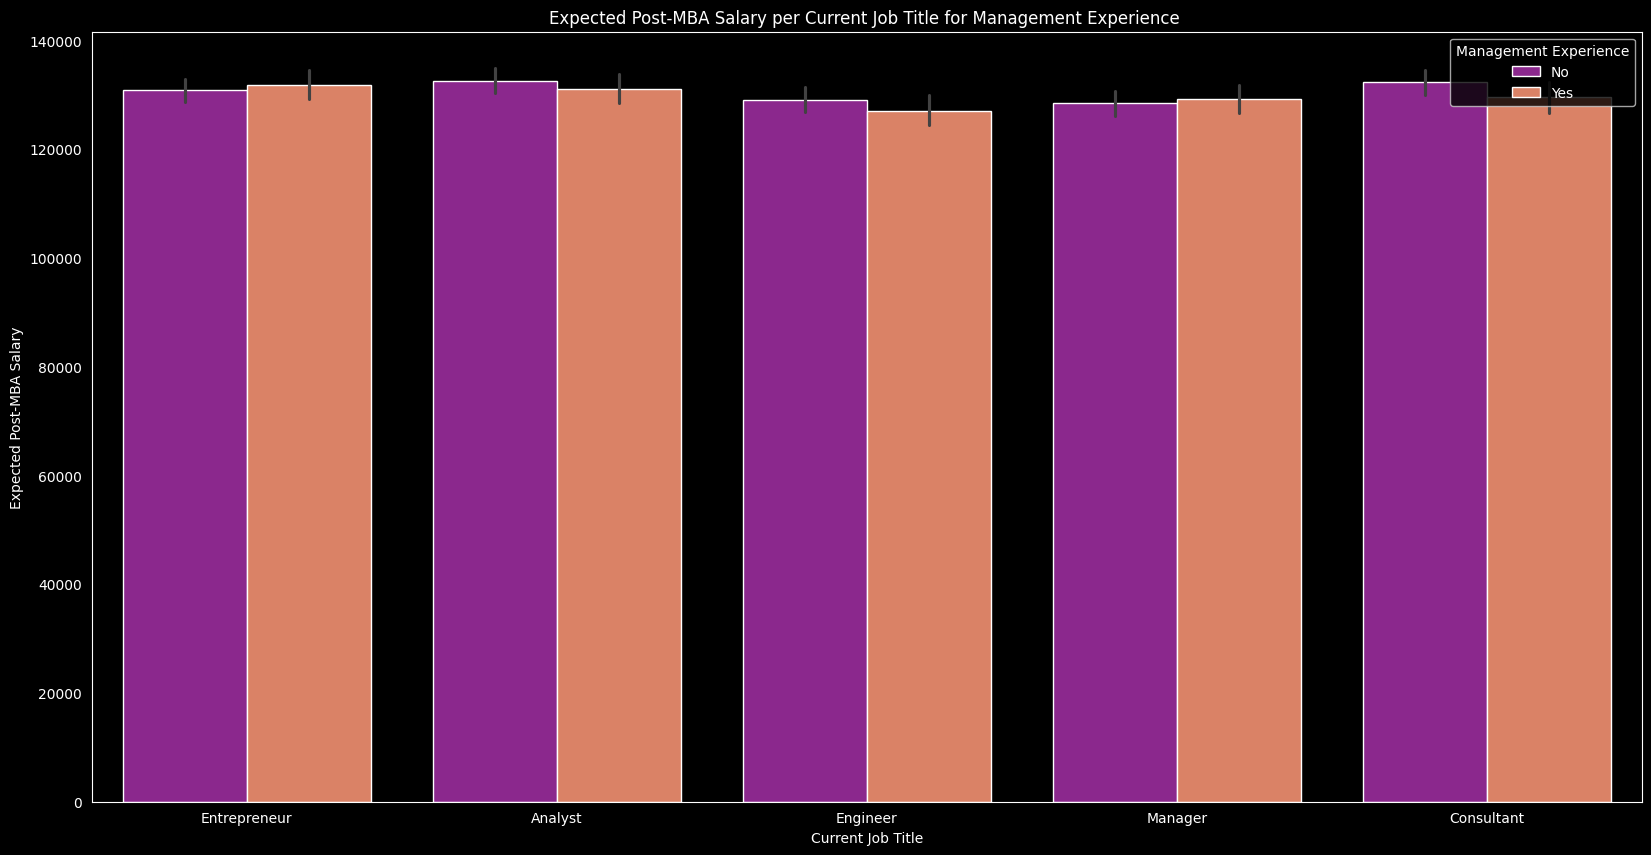

In [29]:
# 5. Expected Post-MBA Salary per Current Job Title for Management Experience.

plt.figure(figsize=(20,10))
sns.barplot(data=data, x='Current Job Title',y='Expected Post-MBA Salary',hue='Has Management Experience',palette='plasma')
plt.title("Expected Post-MBA Salary per Current Job Title for Management Experience ")
plt.legend(title='Management Experience', loc='upper right')
plt.show()

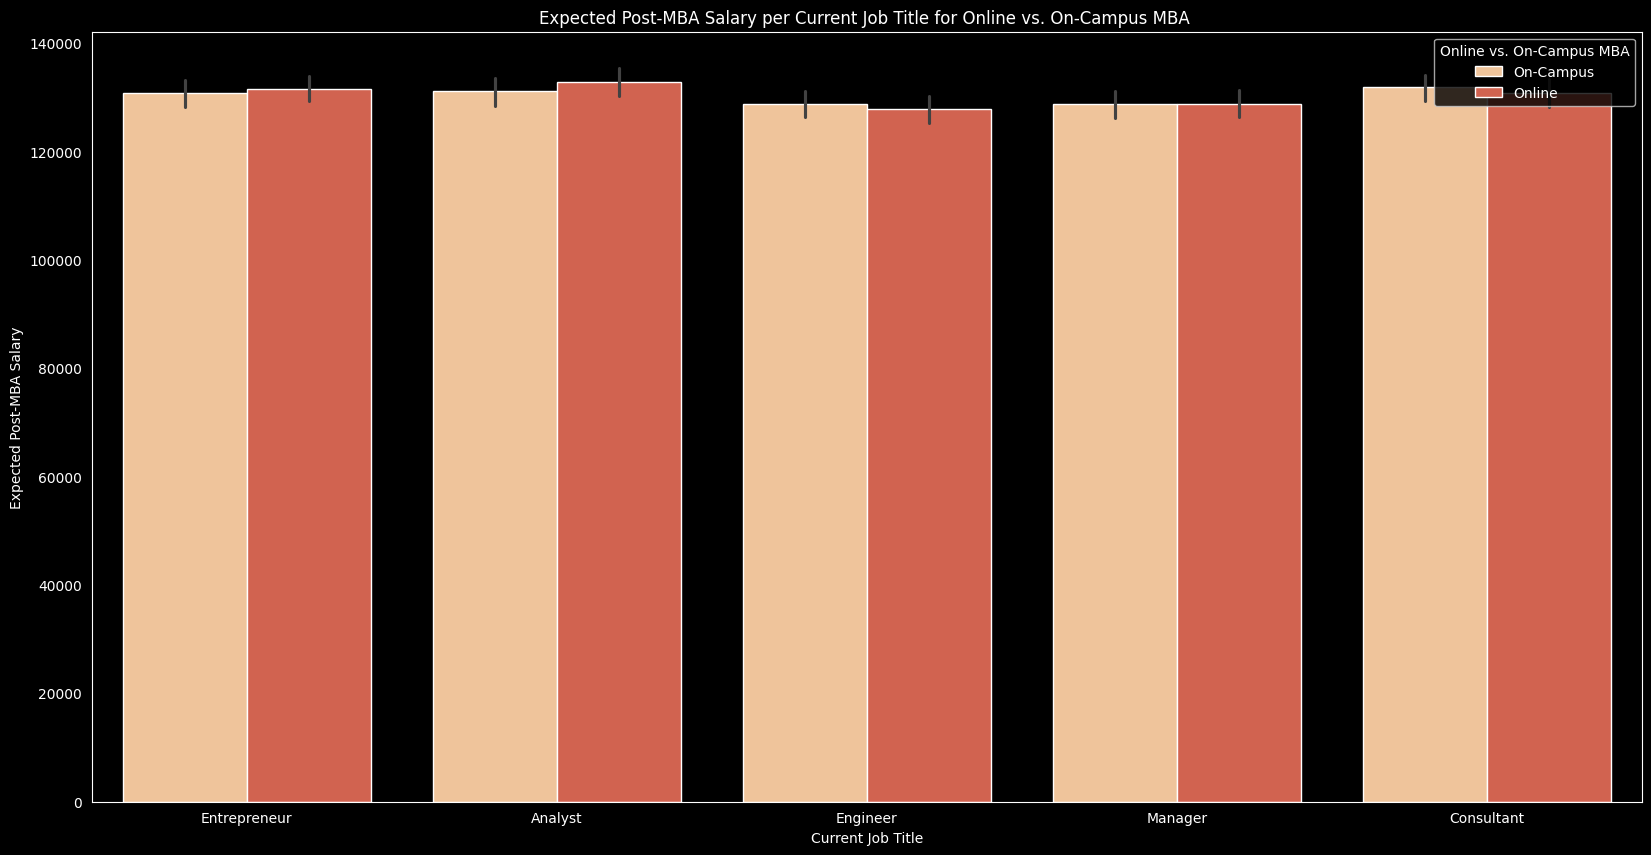

In [30]:
# 6. Expected Post-MBA Salary per Current Job Title for Online vs. On-Campus MBA

plt.figure(figsize=(20,10))
sns.barplot(data=data, x='Current Job Title',y='Expected Post-MBA Salary',hue='Online vs. On-Campus MBA',palette='OrRd')
plt.title("Expected Post-MBA Salary per Current Job Title for Online vs. On-Campus MBA ")
plt.legend(title='Online vs. On-Campus MBA', loc='upper right')
plt.show()


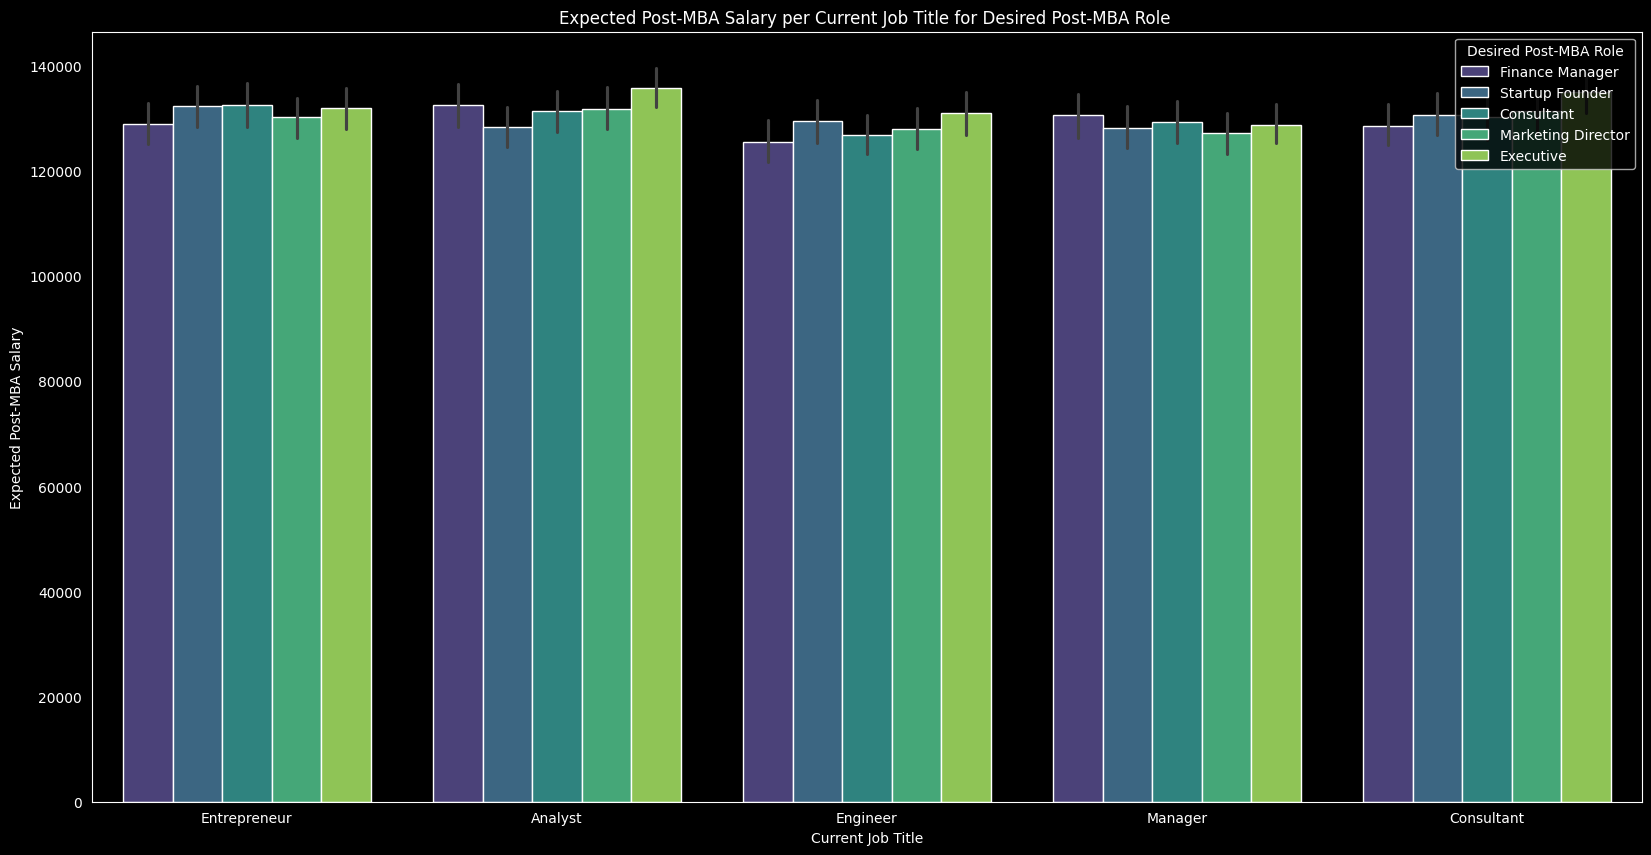

In [31]:
# 7.Expected Post-MBA Salary per Current Job Title for Desired Post-MBA Role
plt.figure(figsize=(20,10))
sns.barplot(data=data, x='Current Job Title',y='Expected Post-MBA Salary',hue='Desired Post-MBA Role',palette='viridis')
plt.title("Expected Post-MBA Salary per Current Job Title for Desired Post-MBA Role ")
plt.legend(title='Desired Post-MBA Role', loc='upper right')
plt.show()

# Modelling


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import confusion_matrix

# Data Preprocessing

In [33]:
#Encoding categorical variables
def dummies(df,cols):
    for col in cols:
        dummies = pd.get_dummies(df[col],dtype=int,prefix=col)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(labels=col, axis=1)
    return df

cols=[]
data = dummies(data,cat)

In [34]:
# Now, we will split the data

X=data.drop('Pursue_MBA',axis=1)
y=data['Pursue_MBA']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(8000, 41) (2000, 41)


In [35]:
#Scaling
scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

# Neural Network

In [36]:
# Define the model
model = Sequential([
    Dense(60, activation='relu', input_shape=(41,)),
    Dense(32, activation='relu', input_shape=(41,)),
    BatchNormalization(),
    Dense(16, activation='relu', input_shape=(41,)),
    Dense(1, activation='sigmoid') ]) # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['precision','accuracy','recall'])

# Train the model
history=model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5890 - loss: 0.7648 - precision: 0.6007 - recall: 0.9398 - val_accuracy: 0.5400 - val_loss: 0.6905 - val_precision: 0.5915 - val_recall: 0.7284
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5944 - loss: 0.6670 - precision: 0.6145 - recall: 0.8721 - val_accuracy: 0.5562 - val_loss: 0.6944 - val_precision: 0.5920 - val_recall: 0.8126
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6003 - loss: 0.6605 - precision: 0.6133 - recall: 0.8642 - val_accuracy: 0.5794 - val_loss: 0.6918 - val_precision: 0.5986 - val_recall: 0.8853
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6191 - loss: 0.6471 - precision: 0.6231 - recall: 0.8957 - val_accuracy: 0.5612 - val_loss: 0.6947 - val_precision: 0.5928 - val_recall: 0.8337
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6303 - loss: 0.6419 - precision: 0.6284 - recall: 0.8925 - val_accuracy: 0.5600 - val_lo

 Model Accuracy: 0.9237499833106995
Model Precision: 0.9345521926879883
 Model Recall: 0.9360403418540955
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


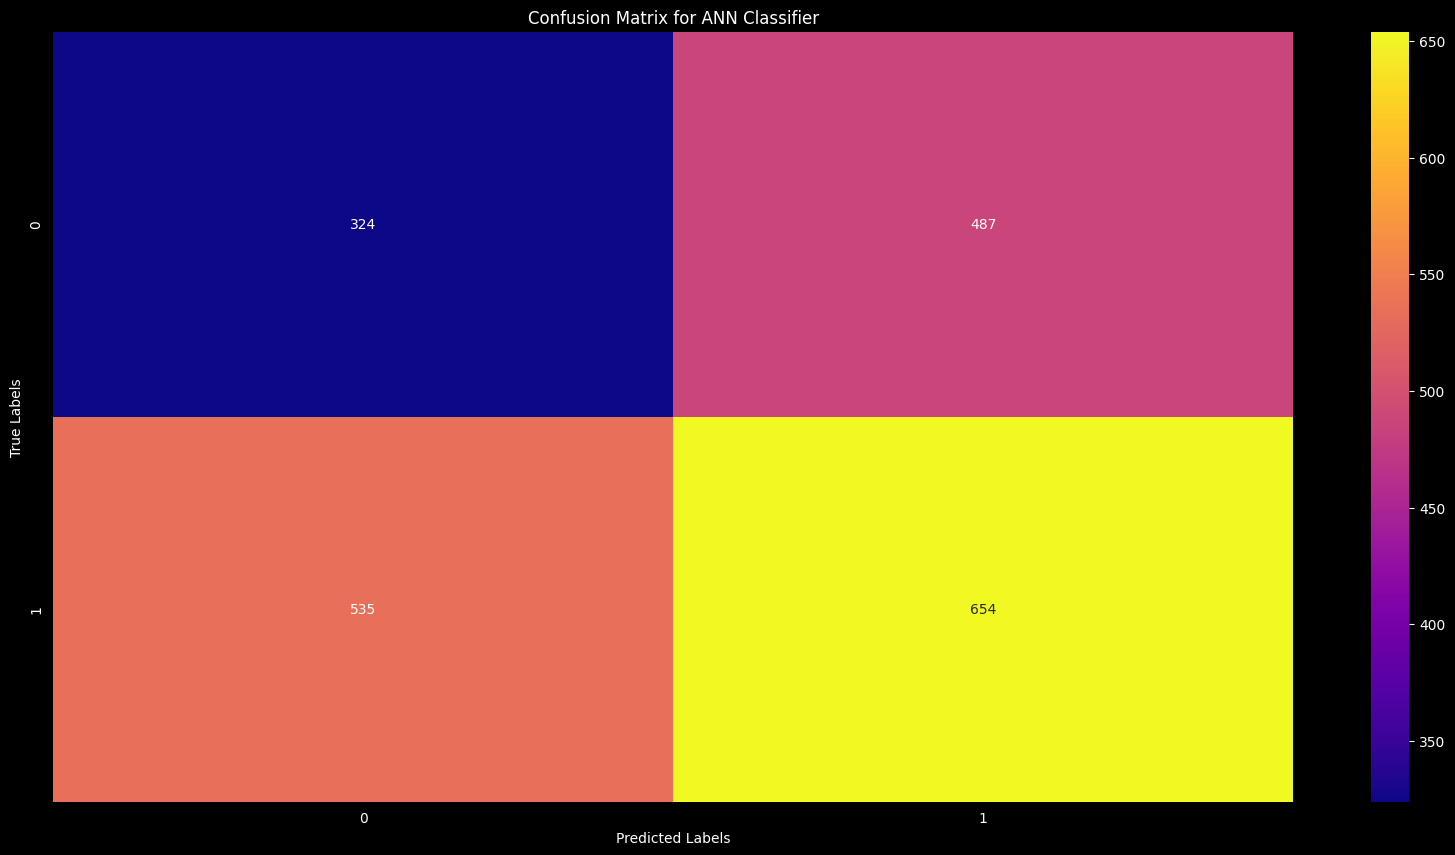

In [37]:
# Model Metrics

print(f" Model Accuracy: {history.history['accuracy'][-1]}")
print(f"Model Precision: {history.history['precision'][-1]}")
print(f" Model Recall: {history.history['recall'][-1]}")

y_pred_ann=(model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test,y_pred_ann)

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')# xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f'Confusion Matrix for ANN Classifier')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()